Coordinates of the first point: 1 1 1
Coordinates of the second point: 3 3 3
Coordinates of the third point: 5 5 5
Coordinates of the fourth point: 7 7 7


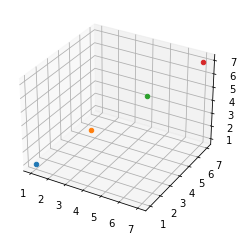

For the first and second points: 
 Euclidean distance: 3.4641016151377544 
 The square of the Euclidean distance: 11.999999999999998 
 Chebyshev distance: 2.0 
 Hemming distance: 6.0
For the second and third points: 
 Euclidean distance: 3.4641016151377544 
 The square of the Euclidean distance: 11.999999999999998 
 Chebyshev distance: 2.0 
 Hemming distance: 6.0
For the third and fourth points: 
 Euclidean distance: 3.4641016151377544 
 The square of the Euclidean distance: 11.999999999999998 
 Chebyshev distance: 2.0 
 Hemming distance: 6.0
For the first and fourth points: 
 Euclidean distance: 10.392304845413264 
 The square of the Euclidean distance: 108.0 
 Chebyshev distance: 6.0 
 Hemming distance: 18.0


In [55]:
# № 1.3.1

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Euclidean_distance(x, y):
    return np.linalg.norm(x - y)

def square_of_Euclidean_distance(x, y):
    return np.linalg.norm(x - y) ** 2

def Chebyshev_distance(x, y):
    return np.linalg.norm(x - y, ord = np.inf)
    
def Hemming_distance(x, y):
    return np.linalg.norm(x - y, ord = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = np.array([1, 1, 1])
y = np.array([3, 3, 3])
z = np.array([5, 5, 5])
w = np.array([7, 7, 7])
print("Coordinates of the first point:", x[0], x[1], x[2])
print("Coordinates of the second point:", y[0], y[1], y[2])
print("Coordinates of the third point:", z[0], z[1], z[2])
print("Coordinates of the fourth point:", w[0], w[1], w[2])
ax.scatter(x[0], x[1], x[2])
ax.scatter(y[0], y[1], y[2])
ax.scatter(z[0], z[1], z[2])
ax.scatter(w[0], w[1], w[2])
plt.show()
print("For the first and second points:", '\n',
      "Euclidean distance:", Euclidean_distance(x, y), '\n',
      "The square of the Euclidean distance:", square_of_Euclidean_distance(x, y), '\n',
      "Chebyshev distance:", Chebyshev_distance(x, y), '\n',
      "Hemming distance:", Hemming_distance(x, y))
print("For the second and third points:", '\n',
      "Euclidean distance:", Euclidean_distance(y, z), '\n',
      "The square of the Euclidean distance:", square_of_Euclidean_distance(y, z), '\n',
      "Chebyshev distance:", Chebyshev_distance(y, z), '\n',
      "Hemming distance:", Hemming_distance(y, z))
print("For the third and fourth points:", '\n',
      "Euclidean distance:", Euclidean_distance(z, w), '\n',
      "The square of the Euclidean distance:", square_of_Euclidean_distance(z, w), '\n',
      "Chebyshev distance:", Chebyshev_distance(z, w), '\n',
      "Hemming distance:", Hemming_distance(z, w))
print("For the first and fourth points:", '\n',
      "Euclidean distance:", Euclidean_distance(x, w), '\n',
      "The square of the Euclidean distance:", square_of_Euclidean_distance(x, w), '\n',
      "Chebyshev distance:", Chebyshev_distance(x, w), '\n',
      "Hemming distance:", Hemming_distance(x, w))

accuracy: 0.913
accuracy: 0.957
accuracy: 1.0


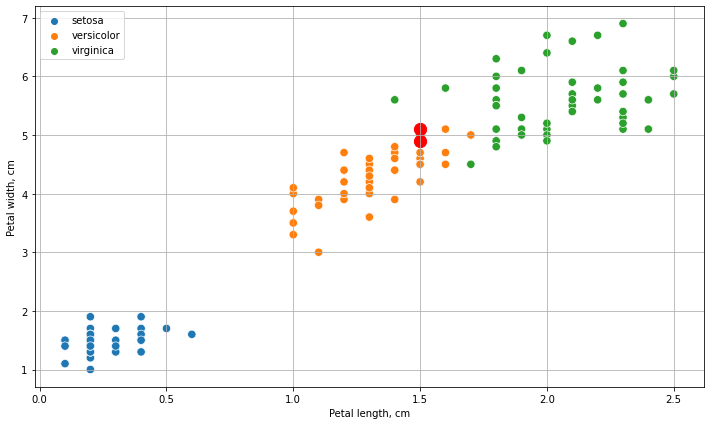

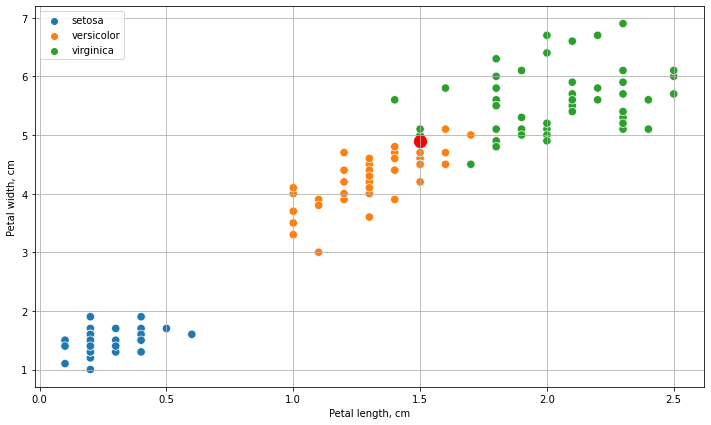

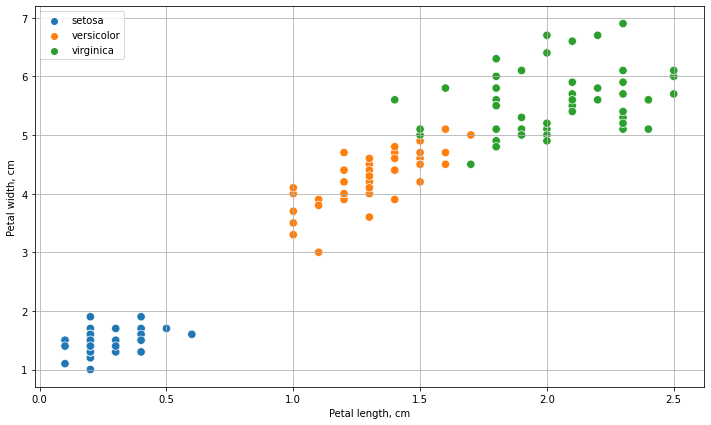

In [13]:
# № 2.3.1

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
x_train, x_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.head()
y_train.head()
neighbors = [1, 5, 10]
for i in neighbors:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred
    plt.figure(figsize = (12, 7))
    plt.subplot()
    sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
    plt.xlabel('Petal length, cm')
    plt.ylabel('Petal width, cm')
    plt.legend(loc=2)
    plt.grid()
    for j in range(len(y_test)):
        if np.array(y_test)[j] != y_pred[j]:
            plt.scatter(x_test.iloc[j, 3], x_test.iloc[j, 2], color='red', s=150)
    print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

In [49]:
# № 3.3.2

from sklearn.feature_extraction import DictVectorizer
import pandas as pd

data_dict = [{"gender": "man", "age": 20, "eye color": "brown", "hair color": "black", "skin color": "white"},
             {"gender": "woman", "age": 20, "eye color": "green", "hair color": "brown", "skin color": "white"},
             {"gender": "man", "age": 18, "eye color": "blue", "hair color": "blonde", "skin color": "white"},
             {"gender": "man", "age": 23, "eye color": "black", "hair color": "brown", "skin color": "swarthy"},
             {"gender": "woman", "age": 21, "eye color": "gray", "hair color": "black", "skin color": "swarthy"}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
pd.DataFrame(features, columns=dictvectorizer.feature_names_, index=["person_1", "person_2", "person_3", "person_4", "person_5"])

,age,eye color=black,eye color=blue,eye color=brown,eye color=gray,eye color=green,gender=man,gender=woman,hair color=black,hair color=blonde,hair color=brown,skin color=swarthy,skin color=white
person_1,20.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
person_2,20.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
person_3,18.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
person_4,23.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
person_5,21.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
